# Supporting information for Kahl et al. (2025) 
'Crystal-Mush Remobilization Timescales and Magma Storage Depth in the Snæfellsnes Volcanic Zone (W-Iceland): Insights from Olivine Fe-Mg Diffusion Chronometry and Fluid Inclusion Barometry'

### You need to install Thermobar once on your machine, if you haven't done this yet, uncomment the line below (remove the #)

In [1]:
# you'll need to upgrade to 1.0.37
#!pip install Thermobar --upgrade

## This imports all the python things you need

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt

## This sets plotting parameters

In [3]:
# This sets some plotting things
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 11 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 11 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 12 # Overall title
plt.rcParams["axes.labelsize"] = 12 # Axes labels



## Loading in Bers data 

In [4]:
# Loading Liquids
out=pt.import_excel('Compiled_Cpx_Data_Nov2024.xlsx', sheet_name="Bud_input_Liq")
my_input_Liqs=out['my_input']
myLiquids1=out['Liqs']

# Loading Cpxs from a different sheet
out2=pt.import_excel('Compiled_Cpx_Data_Nov2024.xlsx', sheet_name="Bud_input_Cpx")
my_input_Cpxs=out2['my_input']
myCPXs1=out2['Cpxs']


# This adds the comment description
myCPXs1['Sample_ID_Cpx'] = myCPXs1['Sample_ID_Cpx'].astype(str) + '_text_' + my_input_Cpxs['Comments'].astype(str)
myCPXs1['Sample_ID_Cpx'].head()

0      Bud-2a Cpx-9-1_text_core
1      Bud-2a Cpx-9-2_text_core
2      Bud-2a Cpx-9-3_text_core
3    Bud-2a Cpx-9-4_text_mantle
4    Bud-2a Cpx-9-5_text_mantle
Name: Sample_ID_Cpx, dtype: object

In [5]:
# You can check inputs have read in right using .head(). Check for columns of zeros where you expected data
display(myLiquids1.head())
display(myCPXs1.head())

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,46.16,3.97,13.33,13.30,0.2439,5.69,11.07,3.12,1.26,0,0.7019,0,0.15,0.0,0.0,0.0,Bud-1180_ol9_GG-1
1,46.10,3.97,13.29,13.07,0.2428,5.62,11.04,3.08,1.26,0,0.6752,0,0.15,0.0,0.0,0.0,Bud-1180_ol9_GG-2
2,46.16,3.94,13.42,13.28,0.2661,5.62,11.08,3.02,1.27,0,0.7269,0,0.15,0.0,0.0,0.0,Bud-1180_ol9_GG-3
3,46.31,4.10,13.49,13.42,0.2298,5.59,11.23,2.68,1.25,0,0.6613,0,0.15,0.0,0.0,0.0,Bud-1180_ol9_GG-4
4,46.16,4.06,13.61,13.56,0.2404,5.52,11.13,2.74,1.31,0,0.7401,0,0.15,0.0,0.0,0.0,Bud-1180_ol9_GG-5


,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,48.89,1.1836,5.94,6.47,0.1085,15.10,21.11,0.3613,0.0,0.1355,Bud-2a Cpx-9-1_text_core
1,49.28,1.2283,6.00,6.56,0.1368,15.17,20.88,0.3321,0.0,0.1064,Bud-2a Cpx-9-2_text_core
2,49.24,1.1917,6.07,6.58,0.1431,15.08,21.05,0.3735,0.0,0.1290,Bud-2a Cpx-9-3_text_core
3,48.45,2.1100,4.50,9.49,0.1751,13.79,20.57,0.3622,0.0,0.1276,Bud-2a Cpx-9-4_text_mantle
4,49.27,2.0700,4.10,9.47,0.2056,14.02,20.36,0.3460,0.0,0.1302,Bud-2a Cpx-9-5_text_mantle


## Lets get unique values of these comments

In [6]:
my_input_Cpxs['Comments'].unique()

array(['core', 'mantle', 'rim', 'quench rim', 'core/ bright sector',
       'core/ dark sector', 'core /bright sector', 'core/dark sector',
       'rim '], dtype=object)

In [7]:
# Lets fix some issues in the dataframe
my_input_Cpxs.loc[my_input_Cpxs['Comments']=='co re', 'Comments']='core'
my_input_Cpxs['Comments'].unique()

array(['core', 'mantle', 'rim', 'quench rim', 'core/ bright sector',
       'core/ dark sector', 'core /bright sector', 'core/dark sector',
       'rim '], dtype=object)

In [8]:
H2O_Liq_set=1

## Lets do Cpx only models
- of course, we get more individual Cpx pressures from these than using liq melt matching, so not quite looking at apples vs. oranges, we will suss this out later. 

In [9]:
PT_Wang=pt.calculate_cpx_only_press_temp( cpx_comps=myCPXs1, 
                                        equationP="P_Wang2021_eq1", equationT="T_Wang2021_eq2", 
                                         H2O_Liq=H2O_Liq_set, eq_tests=False)


PT_Jorg=pt.calculate_cpx_only_press_temp( cpx_comps=myCPXs1, 
                                        equationP="P_Jorgenson2022_Cpx_only", equationT="T_Jorgenson2022_Cpx_only", 
                                         H2O_Liq=H2O_Liq_set, eq_tests=True)

# Lets get all Cpx components
cpx_comps=pt.calculate_clinopyroxene_components(cpx_comps=myCPXs1)

Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a P-independent function


c:\Users\penny\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator ExtraTreeRegressor from version 1.3.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\penny\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator ExtraTreesRegressor from version 1.3.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Youve selected a T-independent function


c:\Users\penny\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator ExtraTreeRegressor from version 1.3.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\penny\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator ExtraTreesRegressor from version 1.3.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [10]:
## Rename the Jorg specific columns
columns_to_modify = [
    'P_kbar_calc', 'T_K_calc', 'Delta_P_kbar_Iter', 'Delta_T_K_Iter',
    'Median_Trees_P', 'Std_Trees_P', 'IQR_Trees_P', 'Median_Trees_T',
    'Std_Trees_T', 'IQR_Trees_T'
]

# Rename only the specified columns
PT_Jorg.rename(columns={col: f"{col}_jorgenson2022" for col in columns_to_modify}, inplace=True)

All_together=PT_Jorg.copy()
All_together.insert(0, 'P_kbar_calc_Wang2021', PT_Wang['P_kbar_calc'])
All_together.insert(1,  'T_K_calc_Wang2021', PT_Wang['T_K_calc'].values)

# Copy results to clipboard
All_together.to_clipboard(excel=True)


## Now lets do melt matching - First lets do it without any eq tests - to see what Mg#s look like for core-mantle rims

In [11]:

# Here we use Neave 2017 for P, and equation 33 from Putirka 2008 for T at H2O=0.5 wt%
MM1_NP_Eq33_allmatch=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=myCPXs1, 
                                        equationP="P_Neave2017", equationT="T_Put2008_eq33", 
                                         H2O_Liq=H2O_Liq_set, iterations=30, return_all_pairs=True,  
                                         Fe3Fet_Liq=0.15)

# These lines extract pandas dataframes from the dictionary MM1
# All matches
MM1_NP_Eq33_All_allmatch=MM1_NP_Eq33_allmatch['All_PTs']
# Averaged match per Cpx (following Neave...)
MM1_NP_Eq33_Av_allmatch=MM1_NP_Eq33_allmatch['Av_PTs']

# Here we use Jorg Cpx-Liq
MM1_Jorg_allmatch=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=myCPXs1, 
                                        equationP="P_Jorgenson2022_Cpx_Liq", equationT="T_Jorgenson2022_Cpx_Liq", 
                                         H2O_Liq=H2O_Liq_set, iterations=30, return_all_pairs=True,  Fe3Fet_Liq=0.15)

# These lines extract pandas dataframes from the dictionary MM1
# All matches
MM1_Jorg_All_allmatch=MM1_Jorg_allmatch['All_PTs']
# Averaged match per Cpx (following Neave...)
MM1_Jorg_Av_allmatch=MM1_Jorg_allmatch['Av_PTs']

Considering N=774 Cpx & N=68 Liqs, which is a total of N=52632 Liq-Cpx pairs, be patient if this is >>1 million!


c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\core.py:1762: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combo_liq_cpxs.replace([np.inf, -np.inf], np.nan, inplace=True)


No equilibrium filters applied
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=52632 Cpx-Liq matches using the specified filter. N=774 Cpx out of the N=774 Cpx that you input matched to 1 or more liquids
Considering N=774 Cpx & N=68 Liqs, which is a total of N=52632 Liq-Cpx pairs, be patient if this is >>1 million!


c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\core.py:1762: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combo_liq_cpxs.replace([np.inf, -np.inf], np.nan, inplace=True)


No equilibrium filters applied
Youve selected a P-independent function


c:\Users\penny\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator ExtraTreeRegressor from version 1.3.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\penny\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator ExtraTreesRegressor from version 1.3.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Youve selected a T-independent function
Youve selected a T-independent function


c:\Users\penny\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator ExtraTreeRegressor from version 1.3.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\penny\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator ExtraTreesRegressor from version 1.3.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=52632 Cpx-Liq matches using the specified filter. N=774 Cpx out of the N=774 Cpx that you input matched to 1 or more liquids


## Lets plot up the equilibrium tests

In [12]:
# Want to calculate Mg# to show on diagram between say 0.4 and 0.7 for the glass
eq_lines_1=pt.calculate_cpx_rhodes_diagram_lines(Min_Mgno=0.35, Max_Mgno=0.75)
eq_lines_1

,Mg#_Liq,Eq_Cpx_Mg# (Kd=0.28),Eq_Cpx_Mg# (Kd=0.2),Eq_Cpx_Mg# (Kd=0.36)
0,0.350000,0.657895,0.729167,0.599315
1,0.354040,0.661870,0.732651,0.603561
2,0.358081,0.665803,0.736088,0.607770
3,0.362121,0.669693,0.739480,0.611942
4,0.366162,0.673541,0.742828,0.616077
...,...,...,...,...
95,0.733838,0.907807,0.932367,0.884509
96,0.737879,0.909532,0.933666,0.886615
97,0.741919,0.911245,0.934954,0.888709
98,0.745960,0.912946,0.936232,0.890789


In [13]:
MM1_NP_Eq33_All_allmatch.columns[MM1_NP_Eq33_All_allmatch.columns.str.contains('Mg')]

Index(['MgO_Liq', 'MgO_Liq_mol_frac', 'Mg_Liq_cat_frac', 'Mg_Number_Liq_NoFe3',
       'Mg_Number_Liq_Fe3', 'MgO_Cpx', 'Mg_Cpx_cat_6ox',
       'En_Simple_MgFeCa_Cpx', 'Fs_Simple_MgFeCa_Cpx', 'Wo_Simple_MgFeCa_Cpx',
       'Ca_CaMgFe', 'Mgno_Cpx', 'Kd_Fe_Mg_Fe2', 'Kd_Fe_Mg_Fe2_Lind',
       'Kd_Fe_Mg_Fet', 'Kd_Fe_Mg_IdealWB', 'Mgno_Liq_noFe3', 'Mgno_Liq_Fe2',
       'DeltaFeMg_WB'],
      dtype='object')

## Supporting Fig S8b

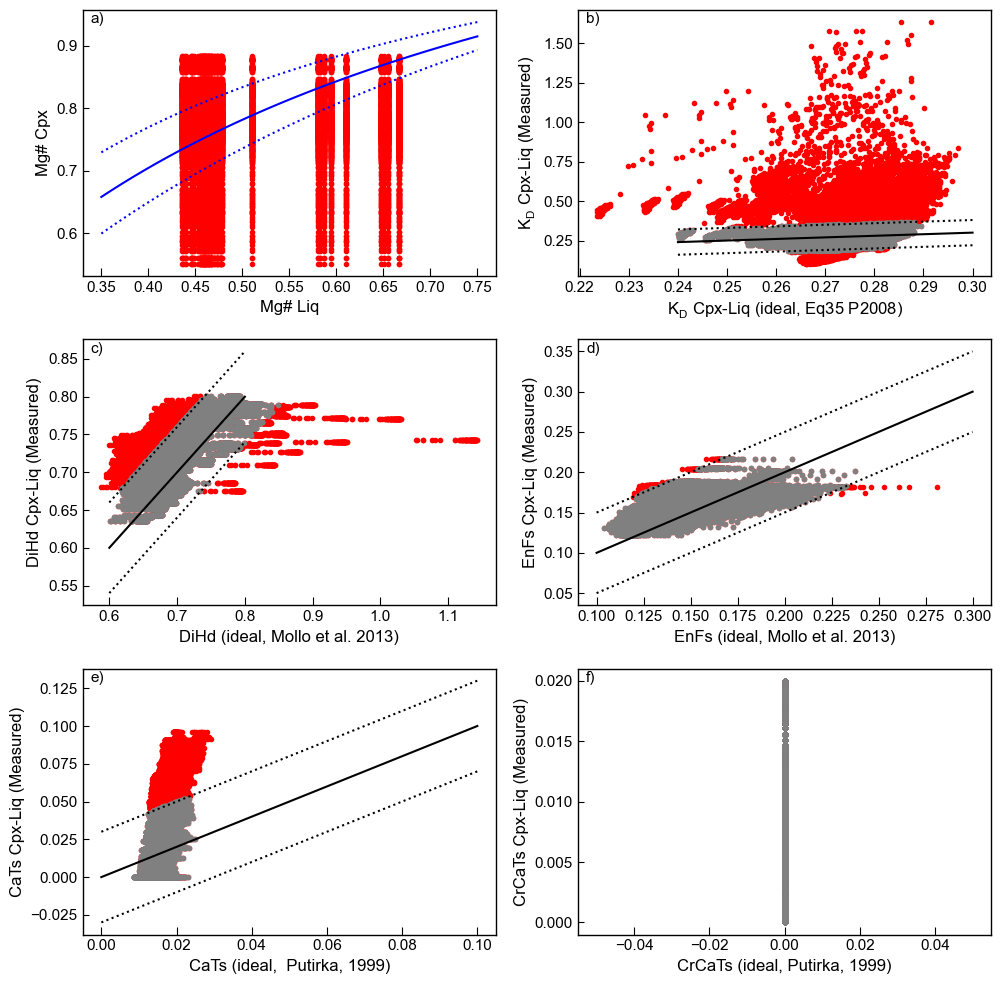

In [14]:
fig, ((ax2, ax1), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize = (10,10))

## Lets show the KD thing
Pass_KD=MM1_NP_Eq33_All_allmatch['Delta_Kd_Put2008'].between(0, 0.08000001)
ax1.plot(MM1_NP_Eq33_All_allmatch['Kd_Ideal_Put'], MM1_NP_Eq33_All_allmatch['Kd_Fe_Mg_Fe2'], '.r')
ax1.plot(MM1_NP_Eq33_All_allmatch['Kd_Ideal_Put'].loc[Pass_KD], 
         MM1_NP_Eq33_All_allmatch['Kd_Fe_Mg_Fe2'].loc[Pass_KD], '.', color='grey')
ax1.plot([0.24, 0.3], [0.24, 0.3], '-k')
ax1.plot([0.24, 0.3], [0.24+0.08, 0.3+0.08], ':k')
ax1.plot([0.24, 0.3], [0.24-0.08, 0.3-0.08], ':k')
ax1.set_ylabel('K$_D$ Cpx-Liq (Measured)')
ax1.set_xlabel('K$_D$ Cpx-Liq (ideal, Eq35 P2008)')

## Lets Plot a Cpx rhodes diagram to show the pairs and which ones pass. 
ax2.plot(MM1_NP_Eq33_All_allmatch['Mg_Number_Liq_Fe3'], MM1_NP_Eq33_All_allmatch['Mgno_Cpx'], '.r')
#ax2.plot(MM1_NP_Eq33_All_allmatch['Mgno_Liq_noFe3'].loc[Pass_KD], MM1_NP_Eq33_All_allmatch['Mgno_Cpx'].loc[Pass_KD], '.', color='grey')
ax2.plot(eq_lines_1['Mg#_Liq'], eq_lines_1['Eq_Cpx_Mg# (Kd=0.2)'], ':b', label="K$_d$=0.2")
ax2.plot(eq_lines_1['Mg#_Liq'], eq_lines_1['Eq_Cpx_Mg# (Kd=0.36)'], ':b', label="K$_d$=0.36")
ax2.plot(eq_lines_1['Mg#_Liq'], eq_lines_1['Eq_Cpx_Mg# (Kd=0.28)'], '-b', label="K$_d$=0.28")
ax2.set_xlabel('Mg# Liq')
ax2.set_ylabel('Mg# Cpx')
########################### Lets show DiHd next#####################################3
ax3.plot(MM1_NP_Eq33_All_allmatch['DiHd_Pred_Mollo13'],
         MM1_NP_Eq33_All_allmatch['DiHd_1996'],
         '.r'
         )
low_DiHd=0.6
high_DiHd=0.8
DiHd_filt=MM1_NP_Eq33_All_allmatch['Delta_DiHd_Mollo13'].between(0, 0.0600001)
ax3.plot(MM1_NP_Eq33_All_allmatch['DiHd_Pred_Mollo13'].loc[DiHd_filt],
         MM1_NP_Eq33_All_allmatch['DiHd_1996'].loc[DiHd_filt],
         '.', color='grey')
ax3.plot([low_DiHd, high_DiHd], [low_DiHd, high_DiHd], '-k')
ax3.plot([low_DiHd, high_DiHd], [low_DiHd+0.06, high_DiHd+0.06], ':k')
ax3.plot([low_DiHd, high_DiHd], [low_DiHd-0.06, high_DiHd-0.06], ':k')
ax3.set_ylabel('DiHd Cpx-Liq (Measured)')
ax3.set_xlabel('DiHd (ideal, Mollo et al. 2013)')


############################# Now En-Fs ##########################################333

ax4.plot(MM1_NP_Eq33_All_allmatch['EnFs_Pred_Mollo13'],
         MM1_NP_Eq33_All_allmatch['EnFs'],
         '.r'
         )
low_EnFs=0.1
high_EnFs=0.3
EnFs_filt=MM1_NP_Eq33_All_allmatch['Delta_EnFs_Mollo13'].between(0, 0.0500001)
ax4.plot(MM1_NP_Eq33_All_allmatch['EnFs_Pred_Mollo13'].loc[EnFs_filt],
         MM1_NP_Eq33_All_allmatch['EnFs'].loc[EnFs_filt],
         '.', color='grey')
ax4.plot([low_EnFs, high_EnFs], [low_EnFs, high_EnFs], '-k')
ax4.plot([low_EnFs, high_EnFs], [low_EnFs+0.05, high_EnFs+0.05], ':k')
ax4.plot([low_EnFs, high_EnFs], [low_EnFs-0.05, high_EnFs-0.05], ':k')
ax4.set_ylabel('EnFs Cpx-Liq (Measured)')
ax4.set_xlabel('EnFs (ideal, Mollo et al. 2013)')

######################################## Now Lets do CaTs ###########################333
ax5.plot(MM1_NP_Eq33_All_allmatch['CaTs_Pred_Put1999'],
         MM1_NP_Eq33_All_allmatch['CaTs'],
         '.r'
         )
low_CaTs=0
high_CaTs=0.1
CaTs_filt=MM1_NP_Eq33_All_allmatch['Delta_CaTs_Put1999'].between(0, 0.0300001)
ax5.plot(MM1_NP_Eq33_All_allmatch['CaTs_Pred_Put1999'].loc[CaTs_filt],
         MM1_NP_Eq33_All_allmatch['CaTs'].loc[CaTs_filt],
         '.', color='grey')
ax5.plot([low_CaTs, high_CaTs], [low_CaTs, high_CaTs], '-k')
ax5.plot([low_CaTs, high_CaTs], [low_CaTs+0.03, high_CaTs+0.03], ':k')
ax5.plot([low_CaTs, high_CaTs], [low_CaTs-0.03, high_CaTs-0.03], ':k')
ax5.set_ylabel('CaTs Cpx-Liq (Measured)')
ax5.set_xlabel('CaTs (ideal,  Putirka, 1999)')


## Ax6
ax6.plot(MM1_NP_Eq33_All_allmatch['CrCaTs_Pred_Put1999'],
         MM1_NP_Eq33_All_allmatch['CrCaTs'],
         '.r'
         )
low_CrCaTs=0
high_CrCaTs=0.1
CrCaTs_filt=MM1_NP_Eq33_All_allmatch['Delta_CrCaTs_Put1999'].between(0, 0.0300001)
ax6.plot(MM1_NP_Eq33_All_allmatch['CrCaTs_Pred_Put1999'].loc[CrCaTs_filt],
         MM1_NP_Eq33_All_allmatch['CrCaTs'].loc[CrCaTs_filt],
         '.', color='grey')

ax6.set_ylabel('CrCaTs Cpx-Liq (Measured)')
ax6.set_xlabel('CrCaTs (ideal, Putirka, 1999)')



ax2.annotate("a)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=11)
ax1.annotate("b)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=11)
ax3.annotate("c)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=11)
ax4.annotate("d)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=11)
ax5.annotate("e)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=11)
ax6.annotate("f)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=11)
fig.tight_layout()
fig.savefig('Bers_Equilibriumtests.png', dpi=300)


## Now lets apply filters

In [15]:

# Here we use Neave 2017 for P, and equation 33 from Putirka 2008 for T at H2O=0.5 wt%
MM1_NP_Eq33=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=myCPXs1, 
                                        equationP="P_Neave2017", equationT="T_Put2008_eq33", Fe3Fet_Liq=0.15,
                                         H2O_Liq=H2O_Liq_set, iterations=30)

# These lines extract pandas dataframes from the dictionary MM1
# All matches
MM1_NP_Eq33_All=MM1_NP_Eq33['All_PTs']
# Averaged match per Cpx (following Neave...)
MM1_NP_Eq33_Av=MM1_NP_Eq33['Av_PTs']

# Here we use Jorg Cpx-Liq
MM1_Jorg=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=myCPXs1, 
                                        equationP="P_Jorgenson2022_Cpx_Liq", equationT="T_Jorgenson2022_Cpx_Liq", 
                                         H2O_Liq=H2O_Liq_set, iterations=30,Fe3Fet_Liq=0.15)

# These lines extract pandas dataframes from the dictionary MM1
# All matches
MM1_Jorg_All=MM1_Jorg['All_PTs']
# Averaged match per Cpx (following Neave...)
MM1_Jorg_Av=MM1_Jorg['Av_PTs']

Considering N=774 Cpx & N=68 Liqs, which is a total of N=52632 Liq-Cpx pairs, be patient if this is >>1 million!


c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\core.py:1762: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combo_liq_cpxs.replace([np.inf, -np.inf], np.nan, inplace=True)


24576 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=12962 Cpx-Liq matches using the specified filter. N=410 Cpx out of the N=774 Cpx that you input matched to 1 or more liquids
Considering N=774 Cpx & N=68 Liqs, which is a total of N=52632 Liq-Cpx pairs, be patient if this is >>1 million!


c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\core.py:1762: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combo_liq_cpxs.replace([np.inf, -np.inf], np.nan, inplace=True)


Youve selected a P-independent function


c:\Users\penny\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator ExtraTreeRegressor from version 1.3.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\penny\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator ExtraTreesRegressor from version 1.3.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Youve selected a P-independent function


c:\Users\penny\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator ExtraTreeRegressor from version 1.3.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\penny\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator ExtraTreesRegressor from version 1.3.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


15673 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Youve selected a P-independent function


c:\Users\penny\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator ExtraTreeRegressor from version 1.3.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\penny\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator ExtraTreesRegressor from version 1.3.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Youve selected a T-independent function
Youve selected a T-independent function


c:\Users\penny\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator ExtraTreeRegressor from version 1.3.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\penny\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator ExtraTreesRegressor from version 1.3.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=14052 Cpx-Liq matches using the specified filter. N=433 Cpx out of the N=774 Cpx that you input matched to 1 or more liquids


## Supporting Fig. S9

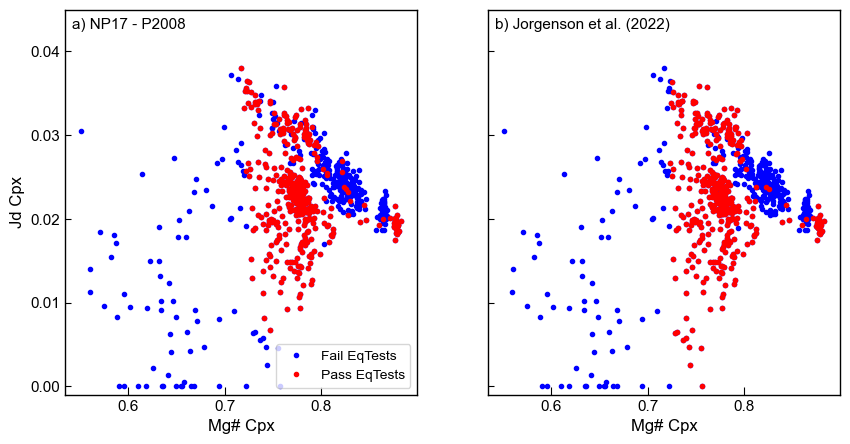

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5), sharey=True)
ax1.plot(cpx_comps['Mgno_Cpx'], cpx_comps['Jd'], '.b', label='Fail EqTests')
ax1.plot(MM1_NP_Eq33_Av['Mean_Mgno_Cpx'], MM1_NP_Eq33_Av['Mean_Jd'], '.r', label='Pass EqTests')
ax1.legend(loc='lower right', fontsize=10)

ax2.plot(cpx_comps['Mgno_Cpx'], cpx_comps['Jd'], '.b')
ax2.plot(MM1_Jorg_Av['Mean_Mgno_Cpx'], MM1_Jorg_Av['Mean_Jd'], '.r')
ax1.set_xlabel('Mg# Cpx')
ax2.set_xlabel('Mg# Cpx')
ax1.set_ylabel('Jd Cpx')

ax1.annotate("a) NP17 - P2008", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=11)
ax2.annotate("b) Jorgenson et al. (2022)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=11)
ax1.set_ylim([-0.001, 0.045])
fig.savefig('Bers_Filter_passing.png', dpi=300, transparent=True)

## Loading in FI data

In [17]:
df_FI=pd.read_excel(r'Compiled_Cpx_Data_Nov2024.xlsx', 
sheet_name='FIData')
df_FI_Bers=df_FI.loc[df_FI['eruption']=='bud']

In [18]:
MM1_Jorg_Av['Sample_ID_Cpx']

0       Bud-2a Cpx-9-5_text_mantle
1         Bud-2a Cpx-9-10_text_rim
2         Bud-2a Cpx-9-11_text_rim
3         Bud-2a Cpx-9-12_text_rim
4         Bud-2a Cpx-9-13_text_rim
                  ...             
428    Bud-4c Cpx-2-15_text_mantle
429       Bud-4c Cpx-2-16_text_rim
430       Bud-4c Cpx-2-18_text_rim
431    Bud-4c Cpx-2-19_text_mantle
432       Bud-4c Cpx-2-20_text_rim
Name: Sample_ID_Cpx, Length: 433, dtype: object

## Fig 5 Main text

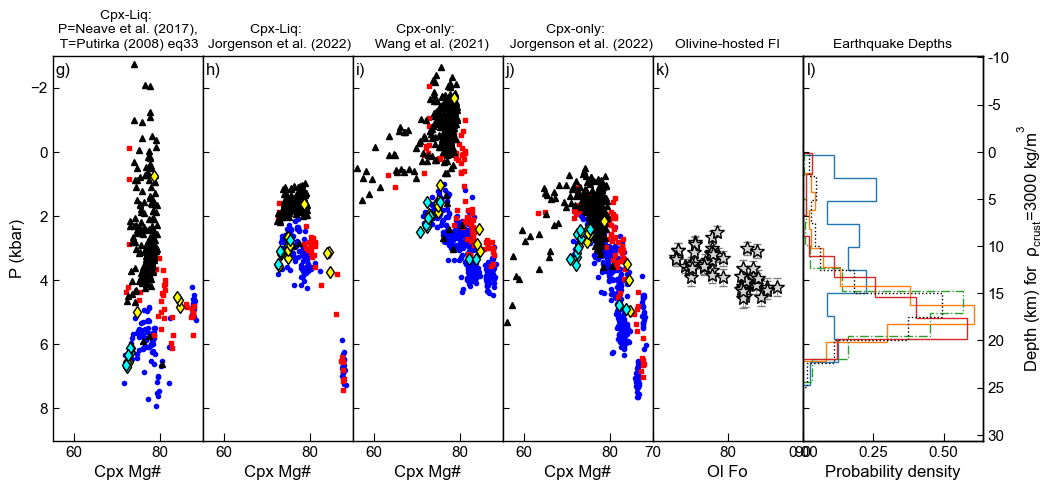

In [21]:
import matplotlib.pyplot as plt

# Define function for plotting
def plot_data(ax, df, mgno_col, p_col, labels, markers, colors, fill_colors, msizes):
    """
    Plots Mg# vs Pressure for different textural zones.
    
    Parameters:
    - ax: The axis to plot on
    - df: DataFrame containing the data
    - mgno_col: Column name for Mg#
    - p_col: Column name for Pressure
    - labels, markers, colors, fill_colors, msizes: Plotting attributes
    """
    for label, marker, color, fill_color, msize in zip(labels, markers, colors, fill_colors, msizes):
        subset = df['Comments'] == label
        ax.plot(df[mgno_col].loc[subset], df[p_col].loc[subset], marker, ms=msize, 
                label=f'Cpx-Liq {label.upper()}', mfc=fill_color if 'dk' in marker else None, mec=color)



widths = [1, 1, 1, 1, 1, 1.2]

fig, ((ax1, ax2, ax3, ax5, ax6, ax7)) = plt.subplots(1, 6, figsize=(12, 5), sharey=True, gridspec_kw={'width_ratios': widths})
fig.subplots_adjust(hspace=0, wspace=0)  # Adjust horizontal and vertical spacing


# Define datasets, corresponding axes, and configurations
datasets = [
    (MM1_NP_Eq33_Av, 'Mgno_Cpx', 'Mean_P_kbar_calc', ax1, 'MM1'),
    (MM1_Jorg_Av, 'Mgno_Cpx', 'Mean_P_kbar_calc', ax2, 'MM1'),
    (PT_Wang, 'Mgno_Cpx', 'P_kbar_calc', ax3, 'Wang'),
    (PT_Jorg, 'Mgno_Cpx', 'P_kbar_calc_jorgenson2022', ax5, 'Jorg')
]

# Define labels, markers, colors, and marker sizes
labels = ['core', 'mantle', 'rim', 'core/ dark sector', 'core/ bright sector']
markers = ['ob', 'sr', '^k', 'dk', 'dk']
colors = ['b', 'r', 'k', 'k', 'k']
fill_colors = [None, None, None, 'yellow', 'cyan']
msizes = [3, 3, 5, 6, 6]  # Marker sizes per category

# Loop through datasets and plot
for df, mgno_col, p_col, ax, source in datasets:
    if source in ['Wang', 'Jorg']:
        df['Comments'] = myCPXs1['Sample_ID_Cpx'].str.split('_text_', expand=True)[1]
        df['Mgno_Cpx'] = 100*(myCPXs1['MgO_Cpx'] / 40.3044) / ((myCPXs1['MgO_Cpx'] / 40.3044) + myCPXs1['FeOt_Cpx'] / 71.844)
    elif 'Sample_ID_Cpx' in df.columns:
        df['Comments'] = df['Sample_ID_Cpx'].str.split('_text_', expand=True)[1]
        df['Mgno_Cpx'] = 100*df['Mean_Mgno_Cpx']
    else:
        print(f"Warning: 'Sample_ID_Cpx' column missing in {df}")
        df['Comments'] = None  # Assign a default value to avoid further errors

    plot_data(ax, df, mgno_col, p_col, labels, markers, colors, fill_colors, msizes)


# Formatting
titles = {
    ax1: 'Cpx-Liq: \n P=Neave et al. (2017), \n T=Putirka (2008) eq33',
    ax2: 'Cpx-Liq: \n Jorgenson et al. (2022)',
    ax3: 'Cpx-only: \n  Wang et al. (2021)',
    ax5: 'Cpx-only: \n  Jorgenson et al. (2022)',
    ax6: 'Olivine-hosted FI'
}

annotations = ['g)', 'h)', 'i)', 'j)', 'k)']
x_labels = ['Cpx Mg#', 'Cpx Mg#', 'Cpx Mg#', 'Cpx Mg#', 'Ol Fo']
x_lim = (0.55*100, 0.90*100)
y_lim = (8, -2)

for i, ax in enumerate([ax1, ax2, ax3, ax5, ax6]):
    ax.annotate(annotations[i], xy=(0.02, 0.95), xycoords="axes fraction", fontsize=12)
    ax.set_title(titles[ax], fontsize=10)
    ax.set_xlabel(x_labels[i])
    ax.set_xlim(x_lim)

ax1.set_ylabel('P (kbar)')
ax1.set_ylim(y_lim)

# Olivine-hosted FI plot
ax6.errorbar(100*df_FI_Bers['Fo'], df_FI_Bers['SingleCalc_P_kbar'],
             xerr=0, yerr=df_FI_Bers['std_dev_MC_P_kbar'],
             fmt='*', ecolor='grey', elinewidth=0.5, mfc='lightgrey', ms=10, mec='k', capsize=3)





#### adding a second limit for showing depth on the RHS
# Set up an array of the pressures you want on the right hand side of the axis
depth_ticks = np.array([-10, -5, 0, 5, 10,15, 20, 25, 30])

pressure_ticks=(depth_ticks*9.8*3000)/10**5


ax7.set_ylim([9, -3])

# This duplicates the y axis
ax = ax7.twinx()

# This ensures that what will be the pressure axis shares the same y lim. This may seem wrong, but its because the right hand axis is still in depth coordinates, that you just calculated above
# with depth_ticks, but the labels are pressure. Clever, right!
ax.set_ylim(ax7.get_ylim())

# Set the ticks on the right y-axis to correspond to the nice depth values
ax.set_yticks(pressure_ticks)
# This then displays the pressures you selected
ax.set_yticklabels([D for D in depth_ticks])
ax7.annotate('l)', xy=(0.02, 0.95), xycoords="axes fraction", fontsize=12)
ax7.set_title('Earthquake Depths', fontsize=10)


## Adding the earthquake data 
df_EQs=pd.read_excel('Compiled_Cpx_Data_Nov2024.xlsx', sheet_name='EQs')
df_EQs['Date'] = pd.to_datetime(df_EQs['Time'], format='%Y %m/%d %H:%M:%S')
df_EQs['Month'] = df_EQs['Date'].dt.month
# now lets caclulate pressure to show on the graph
df_EQs['Pressure']=(df_EQs['Depth (km)']*9.8*3000)/10**5


ax7.hist(df_EQs['Pressure'].loc[(df_EQs['Month']==8) |(df_EQs['Month']==9) ] , orientation='horizontal', label='Aug-Sept', histtype='step',  density=True)
ax7.hist(df_EQs['Pressure'].loc[(df_EQs['Month']==10)|(df_EQs['Month']==11)] , orientation='horizontal', label='Oct-Nov', histtype='step', density=True)
ax7.hist(df_EQs['Pressure'].loc[(df_EQs['Month']==12)|(df_EQs['Month']==1)] , orientation='horizontal', label='Dec-Jan', histtype='step',ls='-.', density=True)
ax7.hist(df_EQs['Pressure'].loc[(df_EQs['Month']==2)|(df_EQs['Month']==3)] , orientation='horizontal', label='Feb-March', histtype='step', density=True)
ax7.hist(df_EQs['Pressure'] , color='black', orientation='horizontal', label='All', histtype='step',ls=':', density=True)
#ax7.legend()
# Set the axes labels
ax.set_ylabel('Pressure (kbar)')
ax.set_ylabel('Depth (km) for  ρ$_{crust}$=3000 kg/m$^3$')
ax7.set_xlabel('Probability density')
ax6.set_xlim([70, 90])
# Save figure
fig.savefig('Textures_Filt_Cpx_FI_Bud.png', dpi=300, transparent=True)





## Supporting Fig. S11

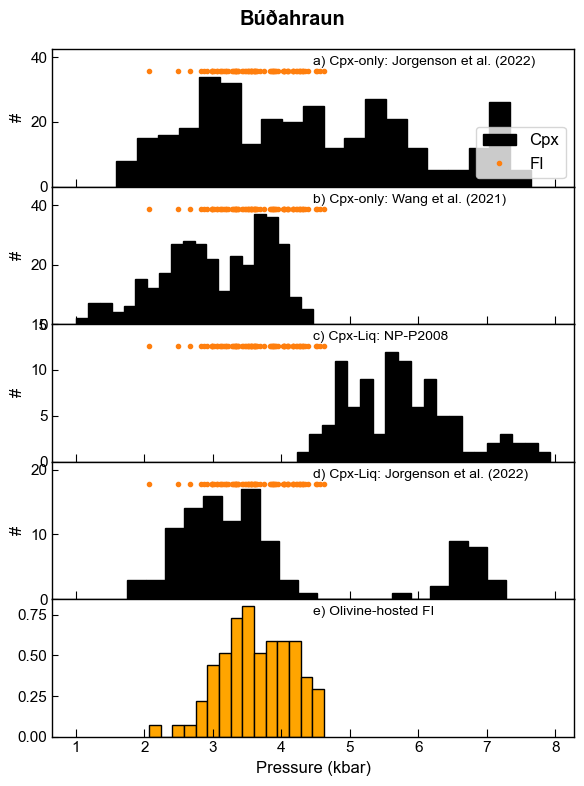

In [20]:
# Cpx only
myCPXs1['Comments'] = myCPXs1['Sample_ID_Cpx'].str.split('_text_', expand=True)[1]
core_cpxonly=myCPXs1['Comments']=='core'


core_wang=PT_Wang['Comments']=='core'
PT_Wang['P_kbar_calc'].loc[core_wang]


MM1_NP_Eq33_Av['comments'] = MM1_NP_Eq33_Av['Sample_ID_Cpx'].str.split('_text_', expand=True)[1]
core_NP=MM1_NP_Eq33_Av['comments']=='core'
MM1_NP_Eq33_Av['Mean_P_kbar_calc'].loc[core_NP]

MM1_Jorg_Av['comments'] = MM1_Jorg_Av['Sample_ID_Cpx'].str.split('_text_', expand=True)[1]
core_JCL=MM1_Jorg_Av['comments']=='core'
MM1_Jorg_Av['Mean_P_kbar_calc'].loc[core_JCL]


import matplotlib.pyplot as plt

# Data preparation (replace these with your actual variables)
data1 = PT_Jorg['P_kbar_calc_jorgenson2022'].loc[core_cpxonly]
data2 = PT_Wang['P_kbar_calc'].loc[core_cpxonly]
data3 = MM1_NP_Eq33_Av['Mean_P_kbar_calc'].loc[core_NP]
data4 = MM1_Jorg_Av['Mean_P_kbar_calc'].loc[core_JCL]

# Create subplots
fig, axes = plt.subplots(nrows=5, figsize=(6, 8), sharex=True)

# Define annotations
annotations = [
    "a) Cpx-only: Jorgenson et al. (2022)",
    "b) Cpx-only: Wang et al. (2021)",
    "c) Cpx-Liq: NP-P2008",
    "d) Cpx-Liq: Jorgenson et al. (2022)"
]

# Plot histograms and add annotations
for i, (ax, data, annotation) in enumerate(zip(axes, [data1, data2, data3, data4], annotations)):
    # Create the histogram and get the bin heights
    counts, bins, patches = ax.hist(data, bins=20, edgecolor='black', fc='black', label='Cpx')
    
    # Find the maximum y-coordinate (max count)
    max_y = np.max(counts) + np.max(counts) / 20
    
    # Plot additional data using the max y-coordinate
    ax.plot(df_FI_Bers['SingleCalc_P_kbar'], [max_y] * len(df_FI_Bers['SingleCalc_P_kbar']), '.', label='FI')
    
    # Set y-label and add annotation
    ax.set_ylabel('#')  # Set y-label to "#"
    ax.annotate(annotation, xy=(0.5, 0.95), xycoords="axes fraction", fontsize=10, ha='left', va='top')
    ax.set_ylim([0, max_y+2*np.max(counts)/10])
    
axes[4].hist(df_FI_Bers['SingleCalc_P_kbar'],  ec='k', fc='orange', bins=15, density=True)
axes[0].legend(loc='lower right')
axes[4].annotate('e) Olivine-hosted FI', xy=(0.5, 0.95), xycoords="axes fraction", fontsize=10, ha='left', va='top')


# Add x-label to the last subplot
axes[-1].set_xlabel('Pressure (kbar)')



fig.suptitle('Búðahraun', fontweight='bold')
# Adjust layout to avoid overlap
plt.tight_layout()
fig.subplots_adjust(hspace=0)
fig.savefig('Cpx_cores_vs_FI_Bud.png', dpi=300)